In [2]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
projetos = {
    "RBT 2.0":{
        "inicio":-6,
        "fim":18,
        "color": "orange",
        "marker": "-",
    },
    "Pesquisa base RBT":{
        "inicio":-2,
        "fim":18,
        "color": "green",
        "marker": "-",
    },
    "Ele. Tracker":{
        "inicio":0,
        "fim":6,
        "color": "red",
        "marker": "-",
    },
    "Sis. Tracker":{
        "inicio":0,
        "fim":5,
        "color": "black",
        "marker": "-",
    },
    "Cons. Tracker":{
        "inicio":6,
        "fim":9,
        "color": "purple",
        "marker": "-",
    },
    "Estru. STEMIS":{
        "inicio":0,
        "fim":4,
        "color": "blue",
        "marker": "-",
    },
}

projetos = pd.DataFrame(projetos)

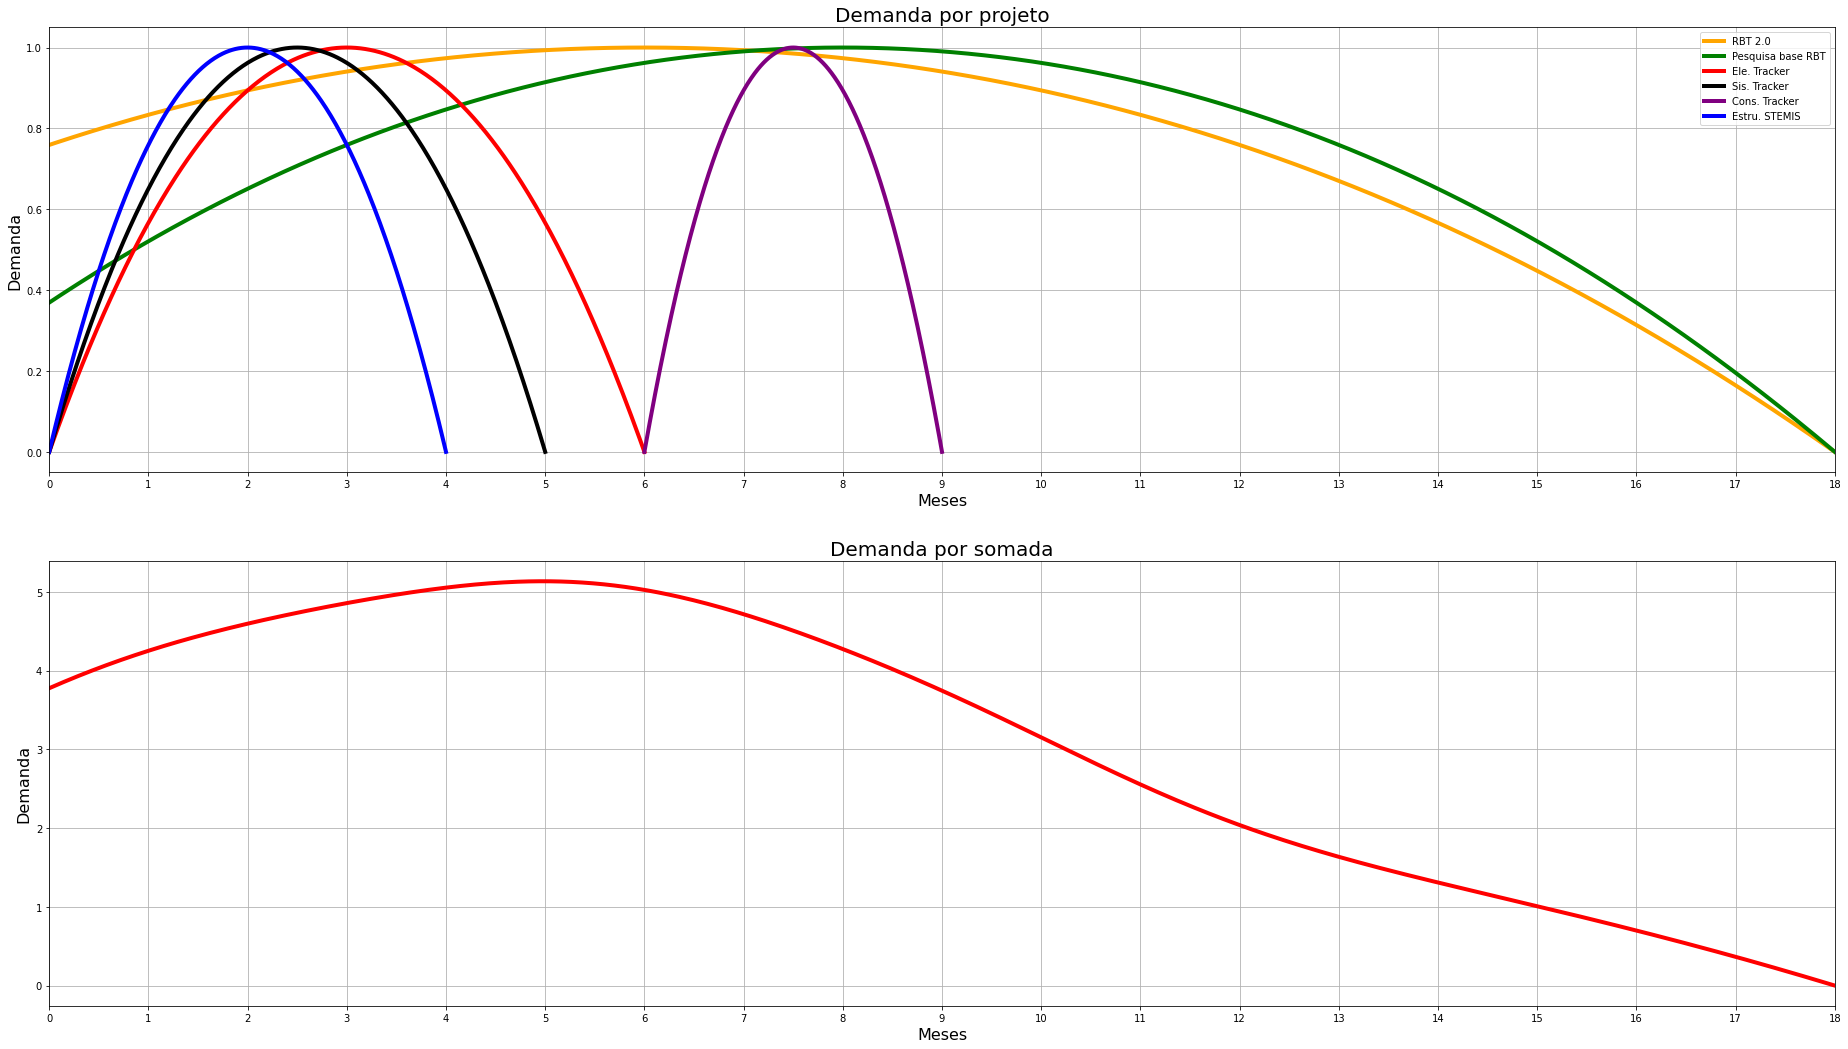

In [4]:
fig = plt.figure(figsize=[32,18])
ax = fig.subplots(2,1)

demanda_somada = np.zeros((500))
aux = np.linspace(0,18,num=500)

for projeto in projetos:
    obj = projetos[projeto]

    tempo = np.linspace(obj.inicio,obj.fim,500)
    tempo.sort()
    gaussian_kernel = stats.gaussian_kde(tempo)

    distribution_kernel = stats.gaussian_kde([min(tempo),max(tempo)])

    # Normalizing data

    norm_distribution = MinMaxScaler().fit_transform(distribution_kernel(tempo).reshape(-1, 1))
    norm_aux_distribution = MinMaxScaler().fit_transform(distribution_kernel(aux).reshape(-1, 1))
    
    for i in range(len(norm_aux_distribution)):
        demanda_somada[i] += norm_aux_distribution[i]

    # Plot the Probability Distribuction Function (PDF)

    ax[0].set_ylabel('Demanda',fontsize=16)
    ax[0].set_xlabel("Meses",fontsize=16)
    ax[0].set_title('Demanda por projeto',fontsize=20)
        
    ax[0].plot(
        tempo, 
        norm_distribution,
        color=obj.color, 
        linestyle=obj.marker, 
        linewidth=4, 
        label=projeto)

ax[0].grid()
ax[0].legend()
ax[0].locator_params(axis='x', nbins=20)
ax[0].set_xlim(0,18)

# Plotando demanda somada

ax[1].set_ylabel('Demanda',fontsize=16)
ax[1].set_xlabel("Meses",fontsize=16)
ax[1].set_title('Demanda por somada',fontsize=20)
    
ax[1].plot(
    aux, 
    demanda_somada,
    color="red", 
    linestyle="-", 
    linewidth=4, 
    )        

ax[1].grid()
ax[1].locator_params(axis='x', nbins=20)
ax[1].set_xlim(0,18)

plt.show()
fig.savefig('Analise_de_projetos.pdf', bbox_inches='tight')